In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({
    'savefig.dpi': 300, 
    "figure.dpi": 300,
    "font.family": "Arial",
    "font.size": 6,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "lines.linewidth": 1.0,
})

cm = 1/2.54  # centimeters in inches

### Plot ASKAP folded lightcurve for all polarisation

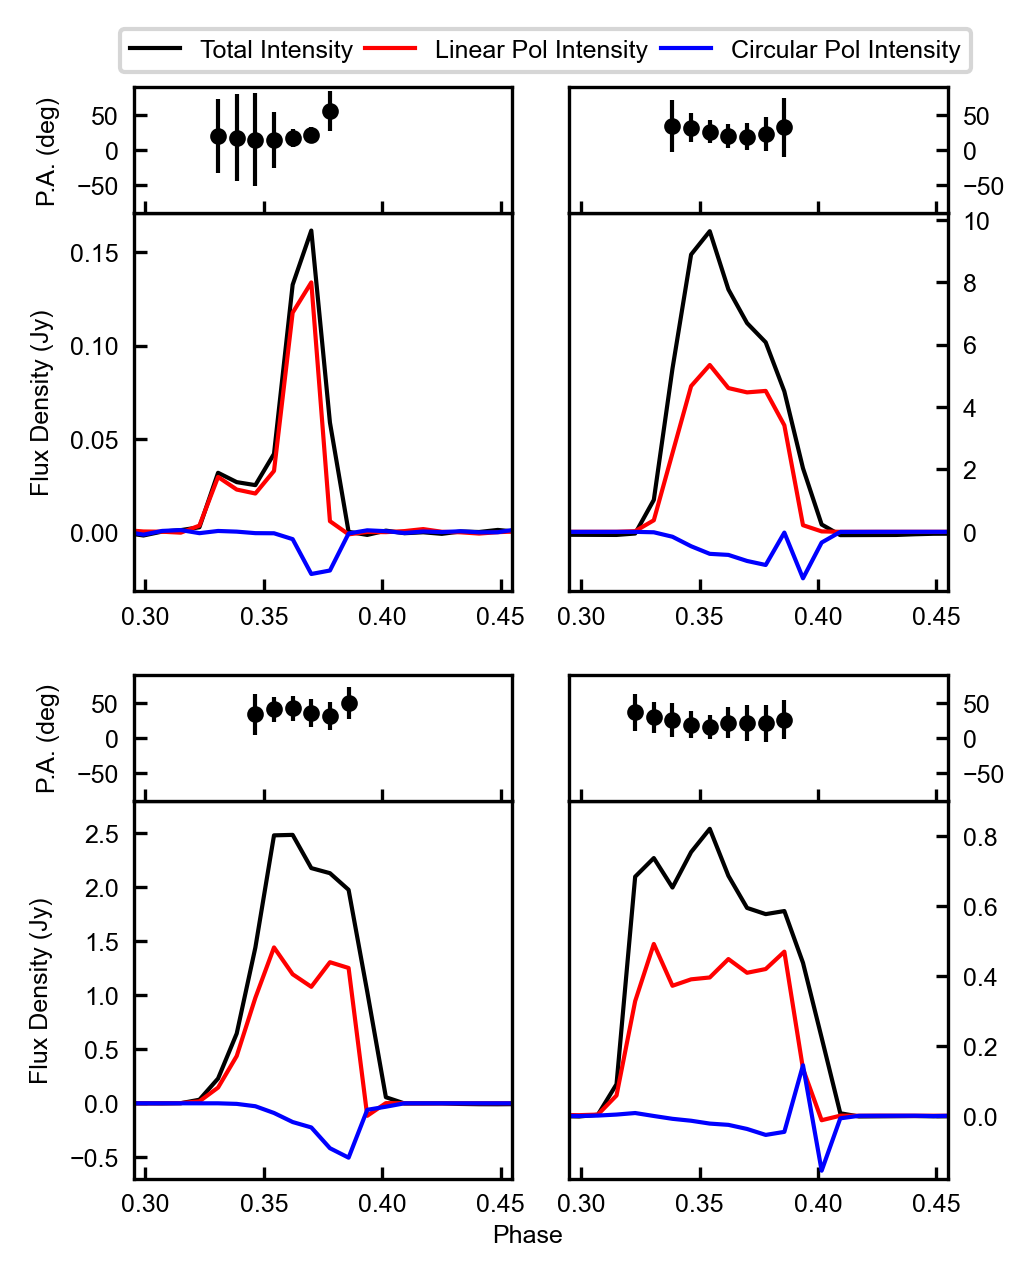

In [33]:
fig = plt.figure(figsize=(8.9*cm, 12*cm))
gs = GridSpec(figure=fig, nrows=26, ncols=2, hspace=0, wspace=0.15)

##### SB58387
ax = fig.add_subplot(gs[3:12, 0])
dat = np.load("../data/askap_folded/askap_SB58387.beam13.J1832-0911.fullpol.fold.npz")
pp = np.linspace(0, 1, dat["I"].shape[0])
ax.plot(pp, dat["I"], color="k", label="Total Intensity")
ax.plot(pp, dat["L"], color="red", label="Linear Pol Intensity")
ax.plot(pp, dat["V"], color="blue", label="Circular Pol Intensity")
ax.set_xlim(0.295, 0.455)
ax.set_ylabel("Flux Density (Jy)")

ax = fig.add_subplot(gs[:3, 0], sharex=ax)
ax.tick_params(labelbottom=False)
paplot = dat["PA"].copy()
paeplot = dat["PA_err"].copy()
pabool = paeplot < 25
paplot[~pabool] = np.nan
paeplot[~pabool] = np.nan
ax.errorbar(pp, paplot, yerr=paeplot * 3, marker="o", color="k", ls="", markersize=3)
ax.set_ylim(-90, 90)
ax.set_ylabel("P.A. (deg)")

##### SB58609
ax = fig.add_subplot(gs[3:12, 1])
dat = np.load("../data/askap_folded/askap_SB58609.beam13.J1832-0911.fullpol.fold.npz")
pp = np.linspace(0, 1, dat["I"].shape[0])
ax.plot(pp, dat["I"], color="k")
ax.plot(pp, dat["L"], color="red")
ax.plot(pp, dat["V"], color="blue")
ax.yaxis.set_ticks_position("right")
ax.set_ylim(-1.9, 10.2)
ax.set_xlim(0.295, 0.455)

ax = fig.add_subplot(gs[:3, 1], sharex=ax)
ax.tick_params(labelbottom=False)
ax.yaxis.set_ticks_position("right")
paplot = dat["PA"].copy()
paeplot = dat["PA_err"].copy()
pabool = paeplot < 15
paplot[~pabool] = np.nan
paeplot[~pabool] = np.nan
ax.errorbar(pp, paplot, yerr=paeplot * 3, marker="o", color="k", ls="", markersize=3)
ax.set_ylim(-90, 90)

##### SB58753
ax = fig.add_subplot(gs[17:26, 0])
dat = np.load("../data/askap_folded/askap_SB58753.beam13.J1832-0911.fullpol.fold.npz")
pp = np.linspace(0, 1, dat["I"].shape[0])
ax.plot(pp, dat["I"], color="k")
ax.plot(pp, dat["L"], color="red")
ax.plot(pp, dat["V"], color="blue")
ax.set_ylim(-0.7, 2.8)
ax.set_xlim(0.295, 0.455)
ax.set_ylabel("Flux Density (Jy)")

ax = fig.add_subplot(gs[14:17, 0], sharex=ax)
ax.tick_params(labelbottom=False)
paplot = dat["PA"].copy()
paeplot = dat["PA_err"].copy()
pabool = paeplot < 10
paplot[~pabool] = np.nan
paeplot[~pabool] = np.nan
ax.errorbar(pp, paplot, yerr=paeplot * 3, marker="o", color="k", ls="", markersize=3)
ax.set_ylim(-90, 90)
ax.set_ylabel("P.A. (deg)")

##### SB58753
ax = fig.add_subplot(gs[17:26, 1])
dat = np.load("../data/askap_folded/askap_SB60091.beam13.J1832-0911.fullpol.fold.npz")
pp = np.linspace(0, 1, dat["I"].shape[0])
ax.plot(pp, dat["I"], color="k")
ax.plot(pp, dat["L"], color="red")
ax.plot(pp, dat["V"], color="blue")
ax.yaxis.set_ticks_position("right")
ax.set_ylim(-0.18, 0.9)
ax.set_xlim(0.295, 0.455)

ax = fig.add_subplot(gs[14:17, 1], sharex=ax)
ax.tick_params(labelbottom=False)
paplot = dat["PA"].copy()
paeplot = dat["PA_err"].copy()
pabool = paeplot < 10
paplot[~pabool] = np.nan
paeplot[~pabool] = np.nan
ax.errorbar(pp, paplot, yerr=paeplot * 3, marker="o", color="k", ls="", markersize=3)
ax.yaxis.set_ticks_position("right")
ax.set_ylim(-90, 90)

##### add phase
plt.text(0.5, 0.07, "Phase", ha="center", va="center", transform=fig.transFigure)

##### set legend #####
fig.legend(
    loc="upper left", bbox_to_anchor=(0.1, 0.9, 1, 0.03), ncol=3, 
    frameon=True, columnspacing=0.5
)
######################

fig.savefig("askap_folded_fullpol_lc.pdf", bbox_inches="tight", dpi=300)